1. Знакомство с данными.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sal = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/salary_dataset.csv')
sal.head()


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


2. Посмотрим базовые статистики

In [ ]:
#Увидим среднюю зарплату в нашей компании  и средний возраст сотрудников.
zp = sal['Salary'].median()
print("Средняя зарплата:",zp)
vozrast = sal['Age'].median()
print("Средний возраст:", vozrast)

Средняя зарплата: 115000.0
Средний возраст: 32.0


In [ ]:
#Увидим базовые статистики.
sal.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


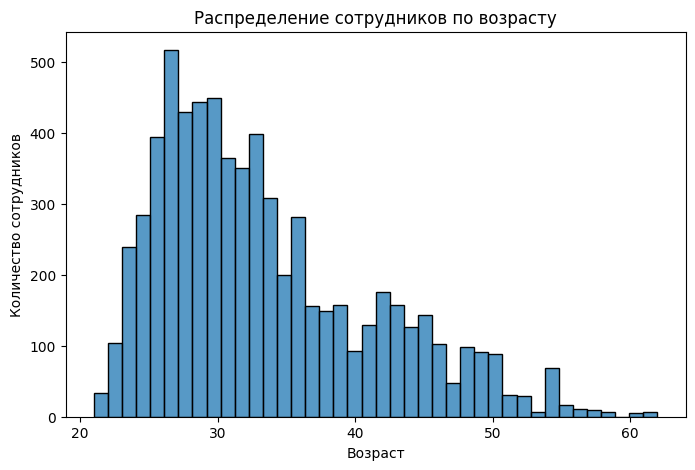

In [ ]:
#Посмотрим распределение данных в разрезе возраста сотрудников.
plt.figure(figsize=[8,5])
sns.histplot(data=sal, x="Age", bins=40)
plt.title("Распределение сотрудников по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Количество сотрудников")
plt.show()

Из графика мы видим, что данные по возрасту распределены с положительным перекосом и есть выбросы. У нас в компании работает несколько человек "за 60".

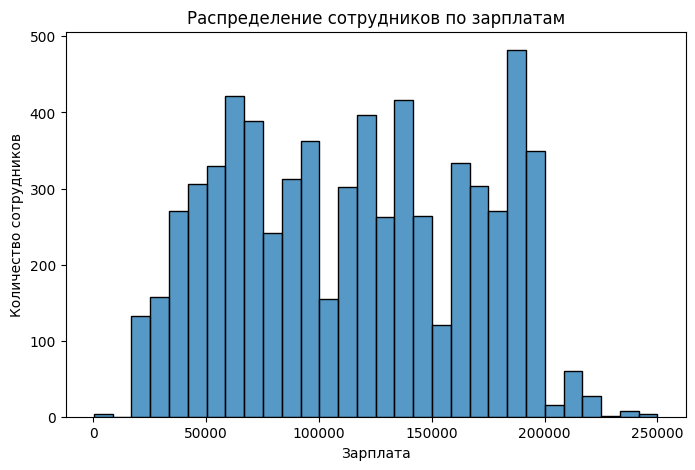

In [ ]:
#Посмотрим распределение данных в разрезе зарплат сотрудников.
plt.figure(figsize=[8,5])
sns.histplot(data=sal, x="Salary", bins=30)
plt.title("Распределение сотрудников по зарплатам")
plt.xlabel("Зарплата")
plt.ylabel("Количество сотрудников")
plt.show()

А из этого графика видно, что что у нас несколько горбов у распределения. Плюс есть выбросы.

In [ ]:
#Посмотрим, что в столбце образование.
sal['Education Level'].value_counts()


,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


Если посмотреть уникальные значения в столбце "Образование", то мы увидим, что из-за другого написания уровень образования "phD" будет выбросом. Как вариант решения: исправить эту данные на PhD.

In [ ]:
sal['Education Level'].replace('phD', 'PhD', inplace=True)
sal['Education Level'].value_counts()

<ipython-input-36-8acf21ca60a8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sal['Education Level'].replace('phD', 'PhD', inplace=True)


,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1369
Bachelor's,756
High School,448
Master's,288


In [ ]:
# Посмотрим есть ли пропуски в данных.
(sal.isna().mean() * 100).round(2)

,0
Unnamed: 0,0.00
Age,0.03
Gender,0.03
Education Level,0.04
Job Title,0.03
Years of Experience,0.04
Salary,0.07
Country,0.00
Race,0.00


In [ ]:
#Посмотрим как в нашей компании распределяются сотрудники по половому признаку.

sal["Gender"].value_counts(normalize=True)

,proportion
Gender,
Male,0.548195
Female,0.449717
Other,0.002089


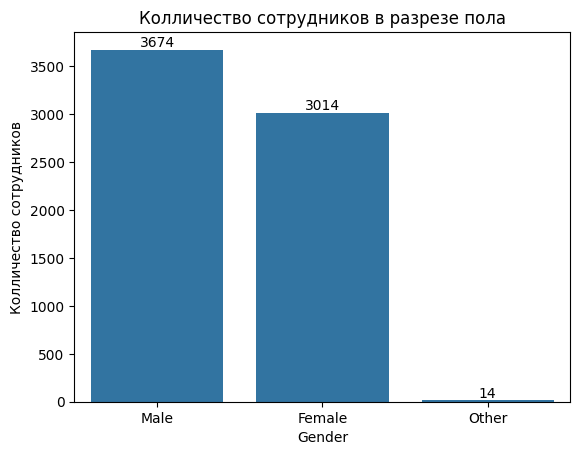

In [ ]:
import seaborn as sns
ax = sns.countplot(data=sal, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Колличество сотрудников в разрезе пола")
plt.ylabel("Колличество сотрудников")
plt.show()

,proportion
Country,
USA,0.202864
China,0.200328
UK,0.199433
Australia,0.199284
Canada,0.198091


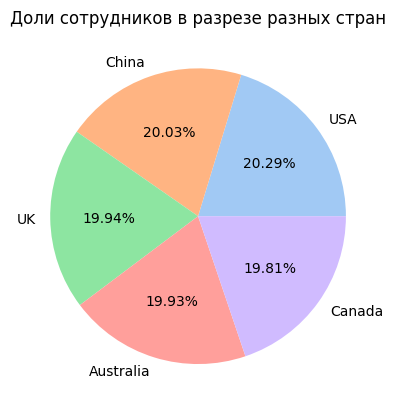

In [ ]:
# Посчитаем доли сотрудников из разных стран в нашей компании.
country = sal["Country"].value_counts(normalize=True)
display(country)

#Построим круговую диаграмму, чтобы посмотреть, соотношение сотрудников из разных стран.
colors = sns.color_palette('pastel')
plt.pie(country, labels=country.index, colors=colors, autopct='%.2f%%')
plt.title("Доли сотрудников в разрезе разных стран")
plt.show()

3. Вопросы. Поищем взаимосвязи между данными.

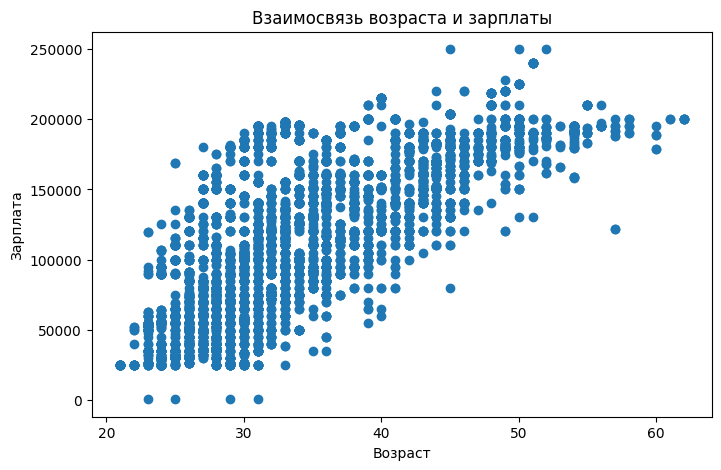

In [ ]:
#Можно посмотреть взаимосвязь возраста сотрудников и их зарплат.
plt.figure(figsize=[8, 5])
plt.scatter(data=sal, x = "Age", y = "Salary")
plt.title("Взаимосвязь возраста и зарплаты")
plt.ylabel("Зарплата")
plt.xlabel("Возраст")
plt.show()

In [ ]:
# Посмотрим взаимосвязь зарпплат сотрудников в разых странах по гендерному признаку.
country = pd.pivot_table(data=sal, index='Country', columns='Gender', values='Salary', aggfunc= 'mean')
country

Gender,Female,Male,Other
Country,,,
Australia,107913.565147,120896.764216,104127.000000
Canada,106884.711340,123982.064865,161347.000000
China,111291.211506,120226.312834,112516.750000
UK,108456.692939,122175.694751,129797.000000
USA,104992.690438,119683.120433,111517.333333


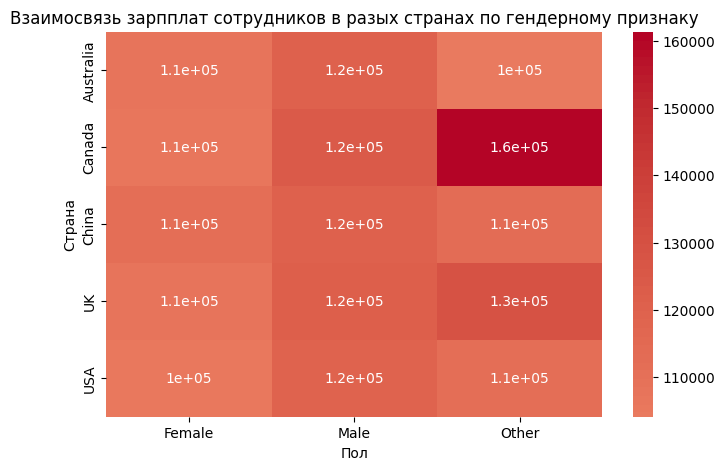

In [ ]:
plt.figure(figsize=[8,5])
sns.heatmap(country, annot=True, cmap='coolwarm', center=0.117)
plt.title("Взаимосвязь зарпплат сотрудников в разых странах по гендерному признаку")
plt.xlabel("Пол")
plt.ylabel("Страна")

plt.show()

In [ ]:
# Посмотрим как распределяются сотрудники мужчины и женщины по возрасту и образованию.
Job = pd.pivot_table(data=sal, index='Gender', columns='Education Level', values='Age')
Job

Education Level,Bachelor's,Bachelor's Degree,High School,Master's,Master's Degree,PhD
Gender,,,,,,
Female,30.309859,30.075410,25.864542,32.864322,34.466053,38.747984
Male,29.779661,30.543639,27.345946,36.202247,36.556980,42.522337
Other,NaN,NaN,40.000000,NaN,37.000000,NaN


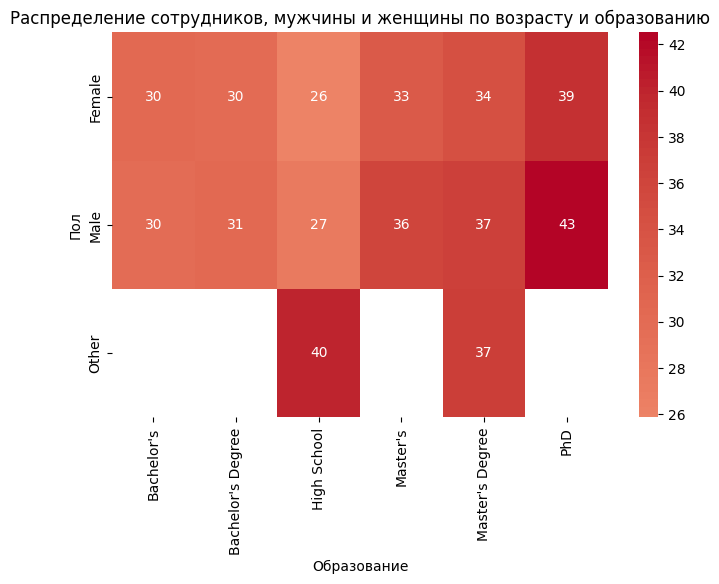

In [ ]:
plt.figure(figsize=[8,5])
sns.heatmap(Job, annot=True, cmap='coolwarm', center=0.117)
plt.title("Распределение сотрудников, мужчины и женщины по возрасту и образованию")
plt.xlabel("Образование")
plt.ylabel("Пол")
plt.show()

In [ ]:
sal.groupby("Gender")["Age"].median().sort_values()
ddd = sal.groupby("Job Title")["Age"].median().sort_values()
sal['Age'].fillna(sal.groupby("Gender")["Age"].transform('median'))


,Age
Gender,
Female,31.0
Male,32.0
Other,37.0
